In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.read_csv("../data/processed/model_results.csv")
results


,model,accuracy,precision,recall,f1
0,KNN,0.692683,0.694444,0.714286,0.704225
1,SVM,0.717073,0.707965,0.761905,0.733945
2,Decision Tree,0.834146,0.844660,0.828571,0.836538
3,Gradient Boosting,0.970732,0.971429,0.971429,0.971429
4,AdaBoost,0.970732,0.962617,0.980952,0.971698
5,XGBoost,0.956098,0.970588,0.942857,0.956522


In [2]:
# generic bar-plot function
def plot_metric(df, metric, title):
    plt.figure(figsize=(10,5))
    sns.barplot(x="model", y=metric, data=df, palette="viridis")
    plt.title(title)
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()


<h3>Accuracy</h3>

C:\Users\habee\AppData\Local\Temp\ipykernel_26528\1109555531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y=metric, data=df, palette="viridis")


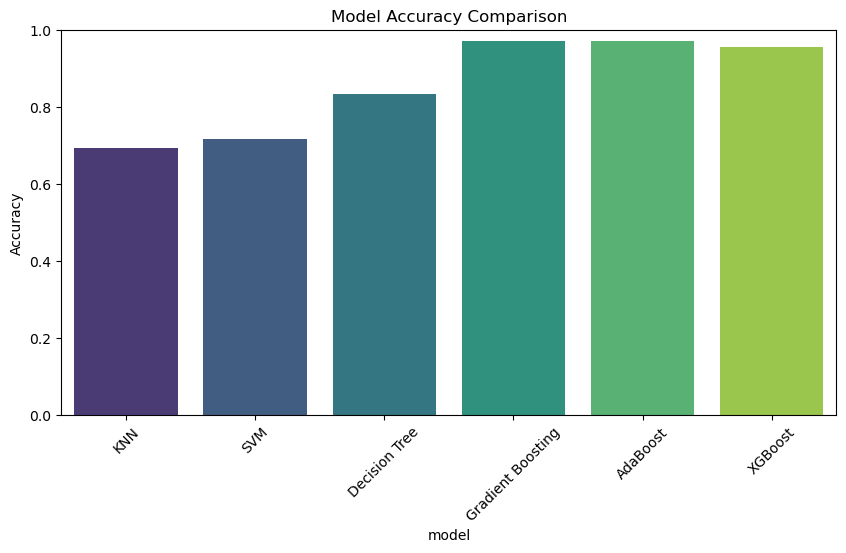

In [3]:
plot_metric(results, "accuracy", "Model Accuracy Comparison")

<h3>Precision</h3>

C:\Users\habee\AppData\Local\Temp\ipykernel_26528\1109555531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y=metric, data=df, palette="viridis")


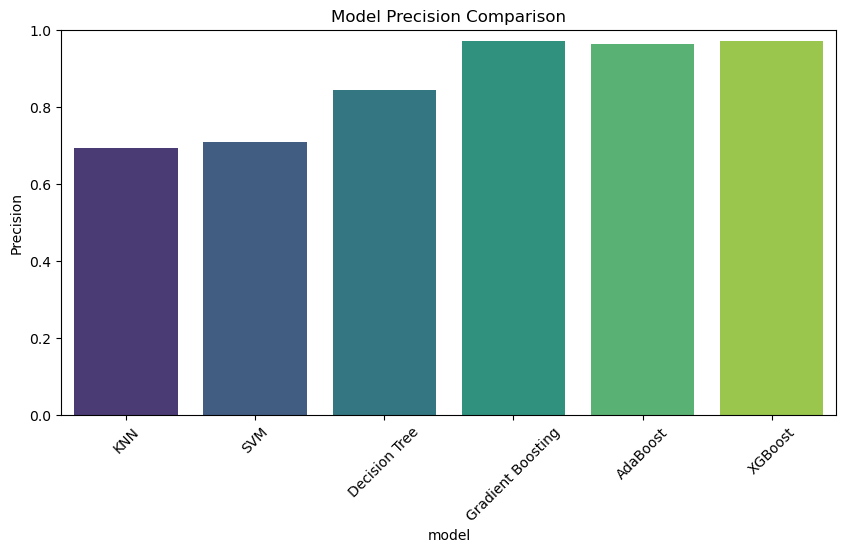

In [4]:
plot_metric(results, "precision", "Model Precision Comparison")

<h3>Recall (Sensitivity)</h3>

C:\Users\habee\AppData\Local\Temp\ipykernel_26528\1109555531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y=metric, data=df, palette="viridis")


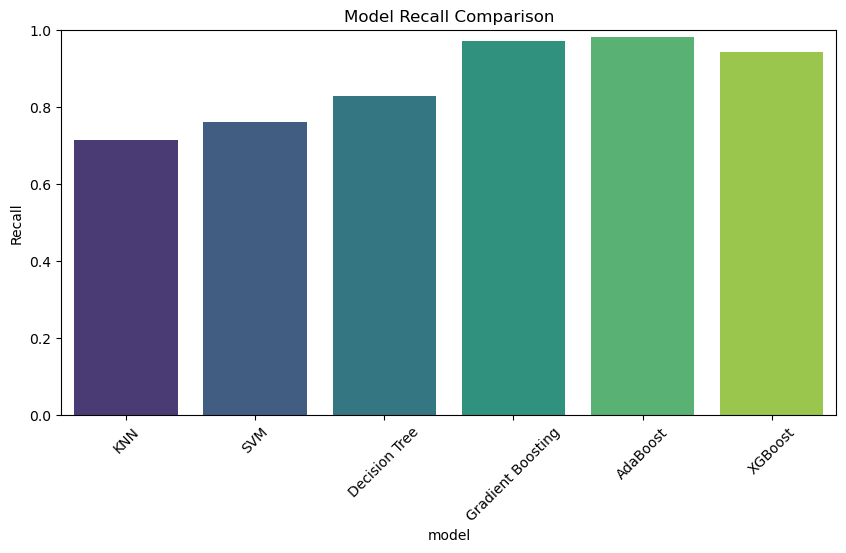

In [5]:
plot_metric(results, "recall", "Model Recall Comparison")


<h3>F1 Score</h3>

C:\Users\habee\AppData\Local\Temp\ipykernel_26528\1109555531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y=metric, data=df, palette="viridis")


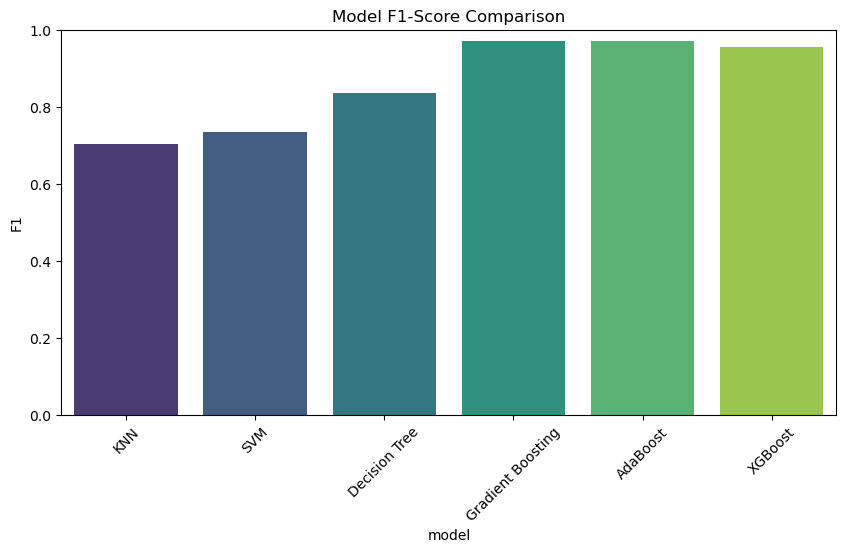

In [6]:
plot_metric(results, "f1", "Model F1-Score Comparison")

<h3>Confusion Matrices</h3>

In [7]:
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_test = pd.read_csv("../data/processed/X_test_selected.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")["target"]


<h4>Plot confusion matrix for each model:</h4>

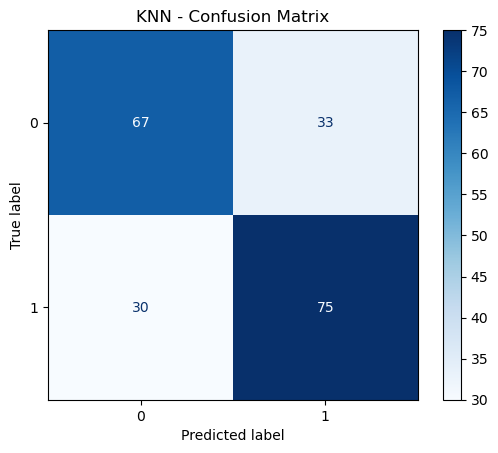

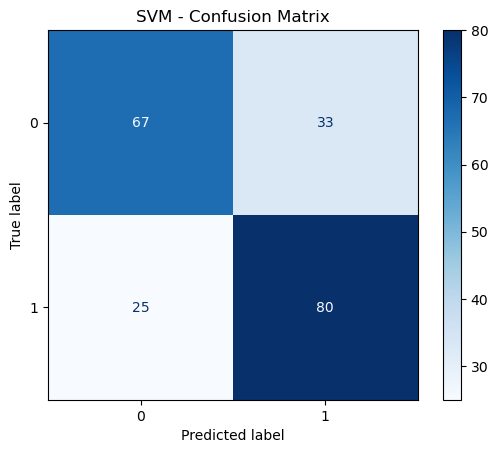

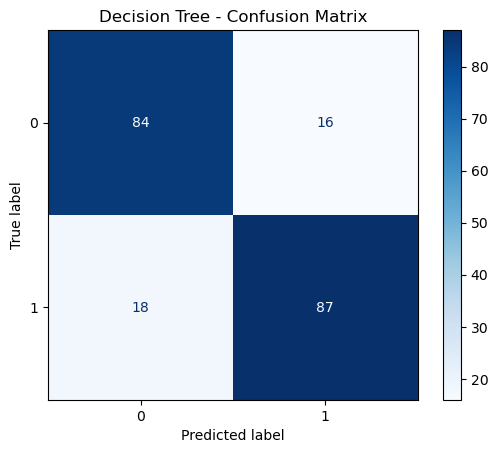

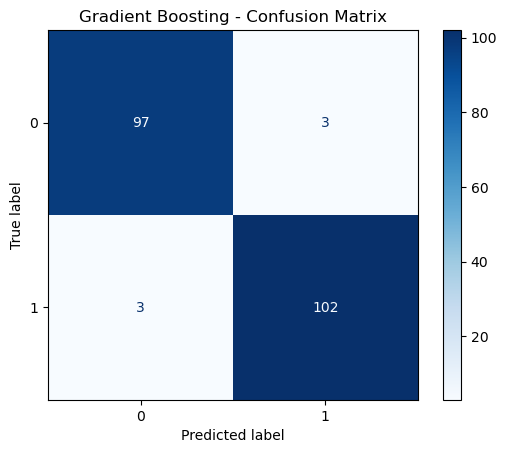

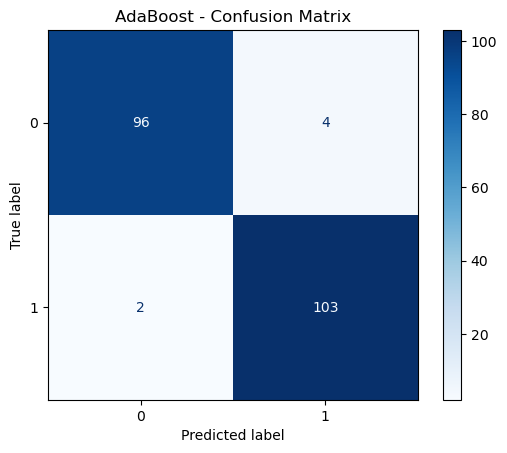

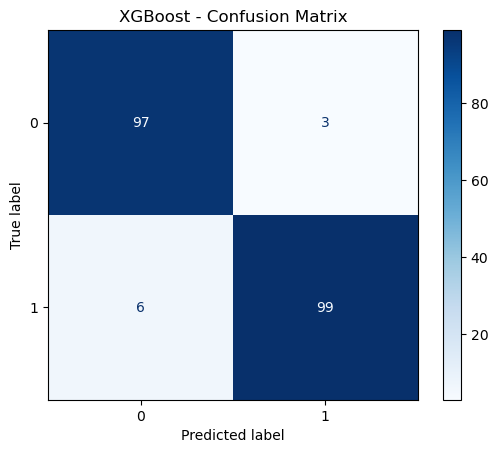

In [8]:
model_names = ["KNN", "SVM", "Decision Tree", "Gradient Boosting", "AdaBoost", "XGBoost"]
model_files = [
    "../data/models/knn_model.pkl",
    "../data/models/svm_model.pkl",
    "../data/models/decision_tree.pkl",
    "../data/models/gradient_boosting.pkl",
    "../data/models/adaboost.pkl",
    "../data/models/xgboost.pkl",
]

for name, file in zip(model_names, model_files):
    model = joblib.load(file)
    preds = model.predict(X_test)

    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


<h3>ROC Curve & AUC</h3>

In [9]:
from sklearn.metrics import roc_curve, auc
import numpy as np

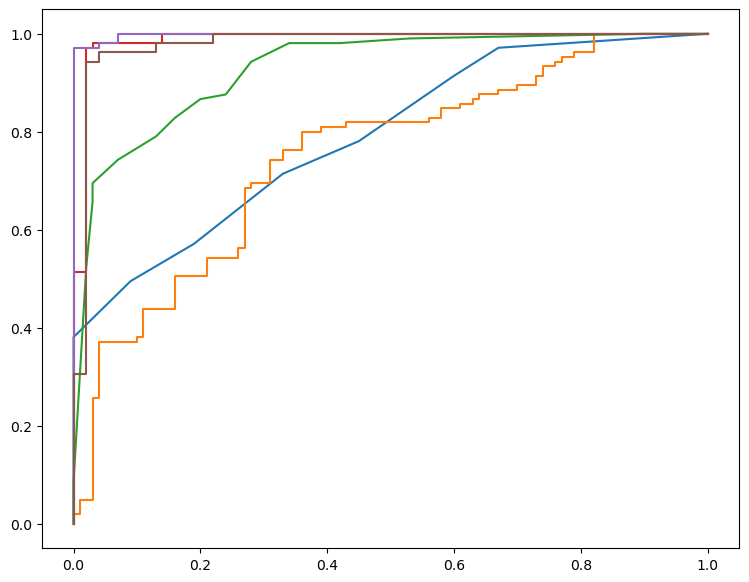

In [10]:
plt.figure(figsize=(9,7))

for name, file in zip(model_names, model_files):
    model = joblib.load(file)

    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, 1]
    else:
        # SVM fallback
        probs = model.decision_function(X_test)
        probs = (probs - probs.min()) / (probs.max() - probs.min())

    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

C:\Users\habee\AppData\Local\Temp\ipykernel_26528\2969937104.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


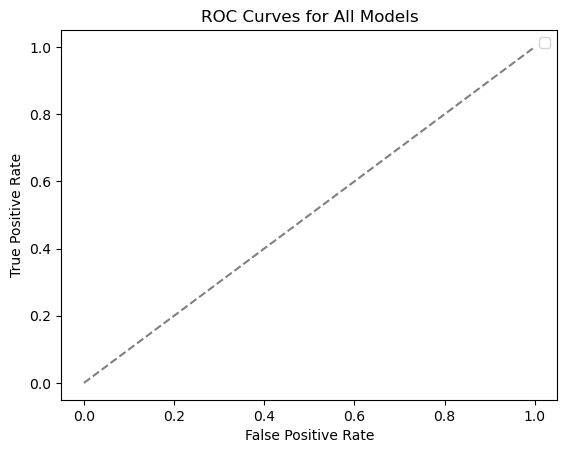

In [11]:
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()